# Customer Segmentation Project:
This project explores customer segmentation using unsupervised machine learning techniques to identify distinct customer groups based on their demographics and spending behavior.

Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize

## Load Dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Cleaning

In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
df.duplicated().sum()

np.int64(0)

## EDA (Exploaratory Data Analysis)

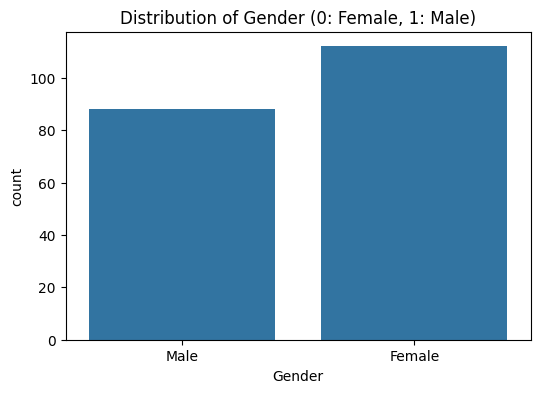

In [9]:
# Countplot for Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Distribution of Gender (0: Female, 1: Male)')
plt.savefig('gender_distribution.png')
plt.show()

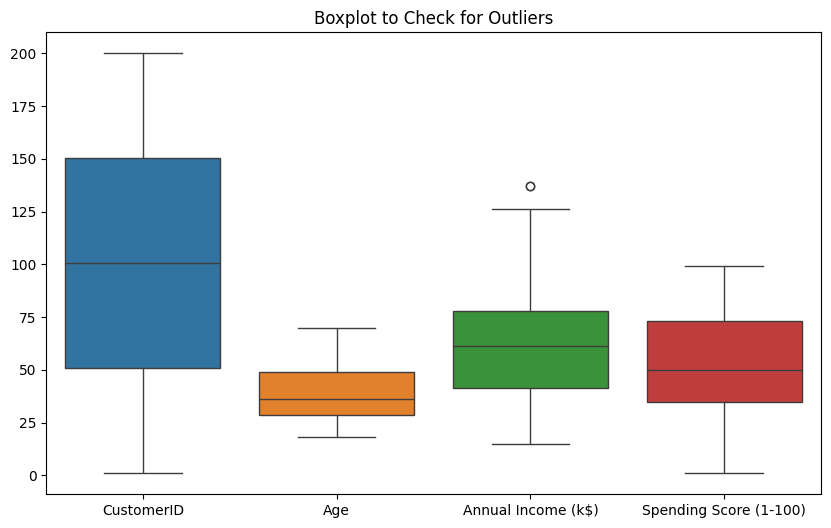

In [10]:
# Check outlier in my df
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Boxplot to Check for Outliers')
plt.savefig('boxplot_outliers.png')
plt.show()

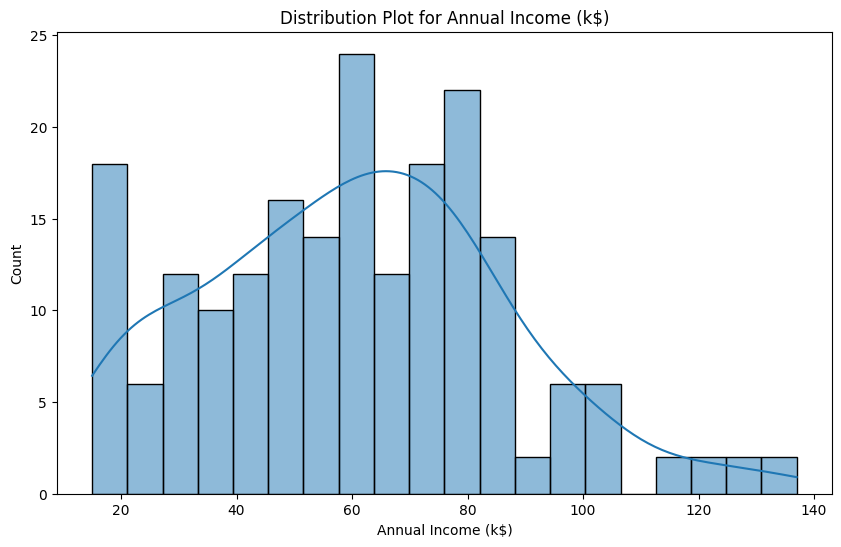

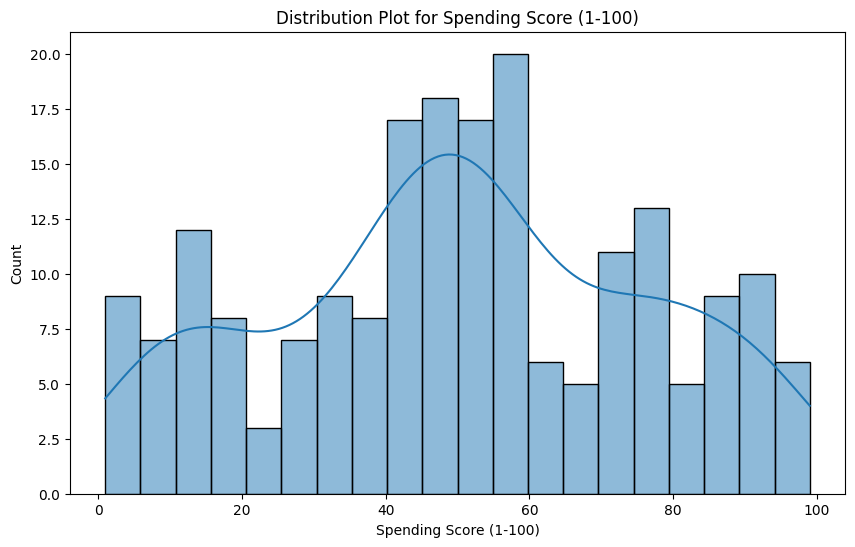

In [11]:
# Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Distribution Plot for Annual Income (k$)')
plt.savefig('annual_income_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Distribution Plot for Spending Score (1-100)')
plt.savefig('spending_score_distribution.png')
plt.show()

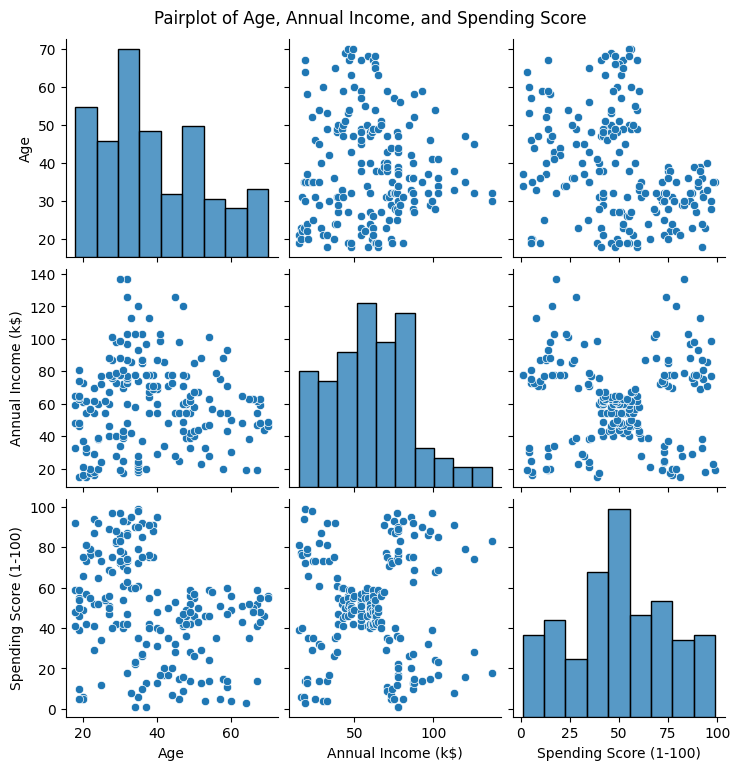

In [12]:
# Pairplot for visualizing relationships between numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02)
plt.savefig('pairplot_features.png')
plt.show()

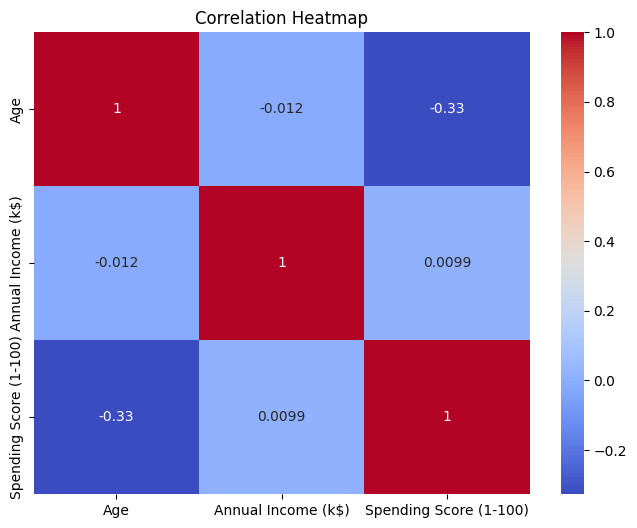

In [13]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

## Feature Engineering

In [14]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [15]:
# Scaling numerical variable
scaler = StandardScaler()
df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']] = scaler.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,-1.424569,-1.738999,-0.434801
1,2,1,-1.281035,-1.738999,1.195704
2,3,0,-1.352802,-1.700830,-1.715913
3,4,0,-1.137502,-1.700830,1.040418
4,5,0,-0.563369,-1.662660,-0.395980


## Dimensionality Reduction

In [16]:
# Apply PCA for visualization (2D)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])

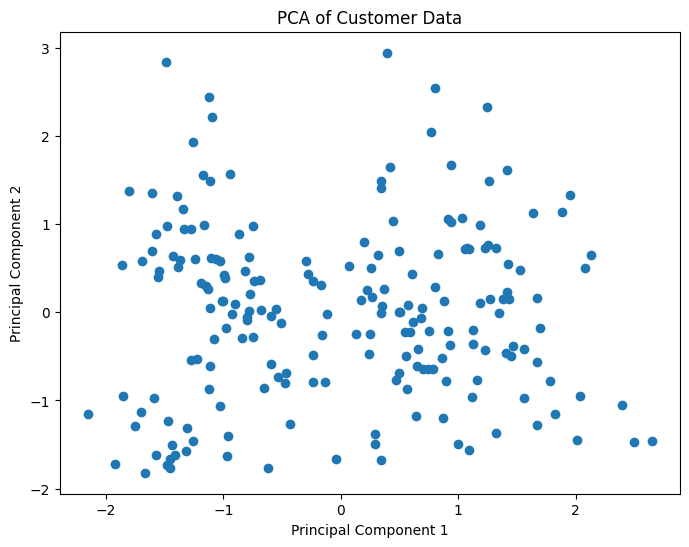

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Data')
plt.savefig('pca_of_customer_data.png')
plt.show()

## Building Clustering model

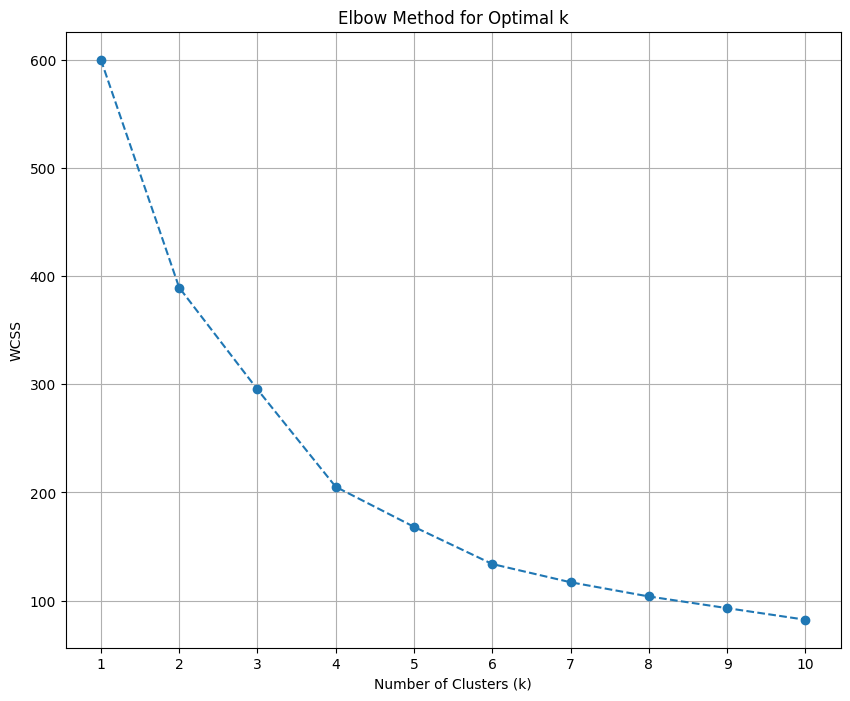

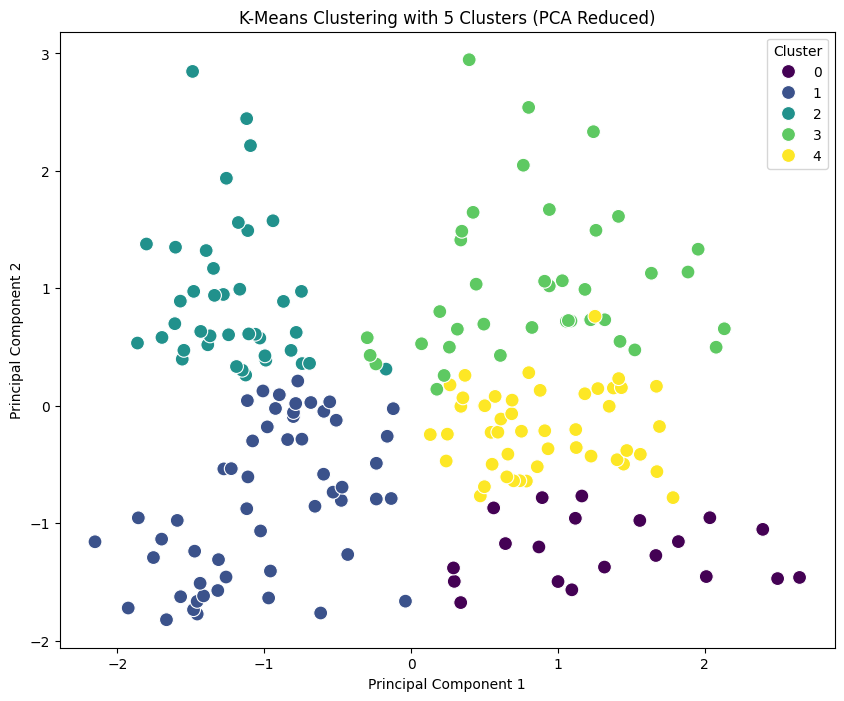

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1 -1.424569           -1.738999               -0.434801   
1           2       1 -1.281035           -1.738999                1.195704   
2           3       0 -1.352802           -1.700830               -1.715913   
3           4       0 -1.137502           -1.700830                1.040418   
4           5       0 -0.563369           -1.662660               -0.395980   

   Cluster  
0        1  
1        1  
2        0  
3        1  
4        1  


In [18]:
# Perform k-means clustering and finding optimal k using elbow method

X = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

# Based on the elbow method, the optimal number of clusters appears to be 5.
optimal_k = 5

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
kmeans_label = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['Cluster'] = kmeans_label

# Visualize the clusters using PCA data
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering with {optimal_k} Clusters (PCA Reduced)')
plt.legend(title='Cluster')
plt.savefig('kmeans_pca_clusters.png')
plt.show()

# Display the first few rows with the new cluster assignments
print(df.head())

## Evaluating the cluster

In [19]:
# Evaluating using Silhouette Score

from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(X, df['Cluster'])

print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.41664341513732767


Cluster Characteristics:
         Annual Income (k$)  Spending Score (1-100)       Age
Cluster                                                      
0                 -1.290508               -1.236467  0.531074
1                 -0.743060                0.467440 -0.980679
2                  0.974847                1.216085 -0.428806
3                  0.974945               -1.197297  0.073331
4                 -0.235773               -0.052368  1.204841


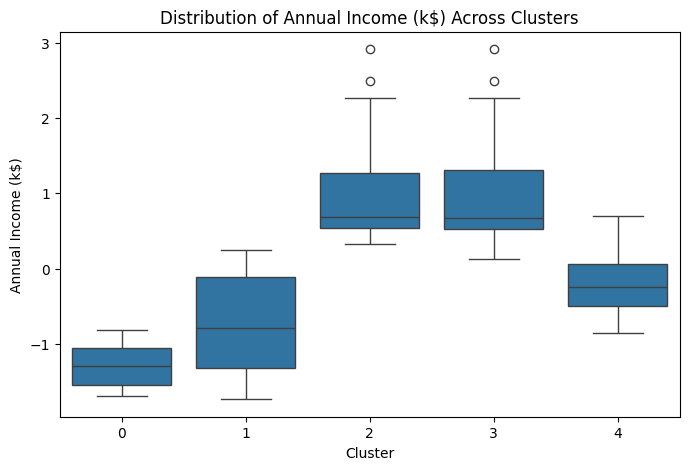

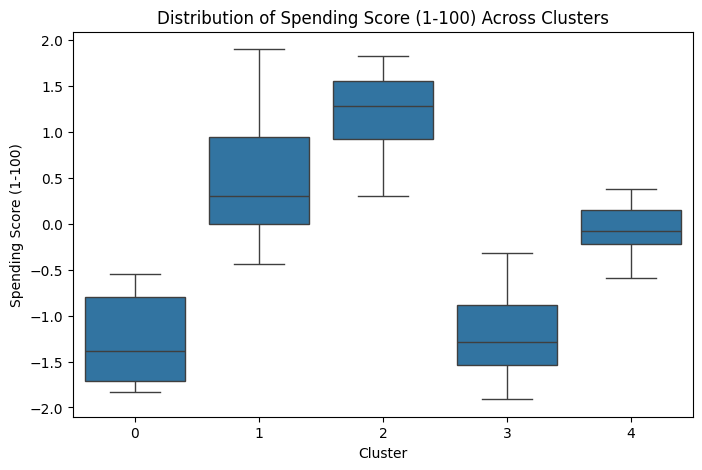

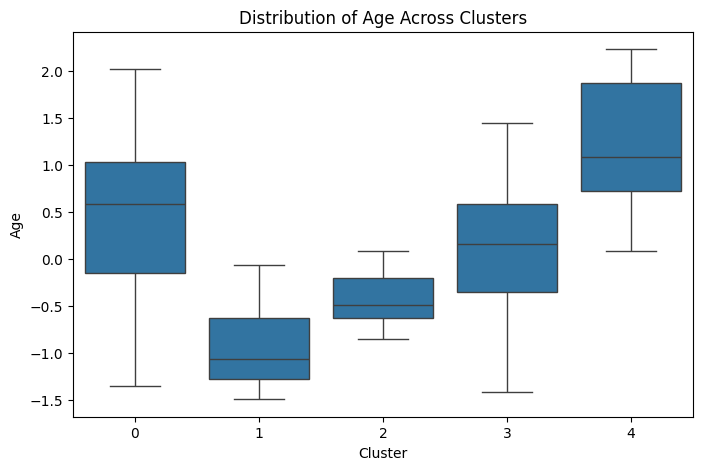

In [20]:
# Analyzing the characteristics of each cluster
cluster_means = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']].mean()
print("Cluster Characteristics:")
print(cluster_means)


# Visualizing the distribution of each feature within each cluster
for feature in ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.savefig(f'{feature.replace(" ", "_").replace("(", "").replace(")", "").replace("$", "")}_distribution_by_cluster.png')
    plt.show()

## Profiling clusters group

In [21]:
# Analyzing and describing each cluster based on the mean values
print("\nCluster Profile Summary:")
for cluster in range(optimal_k):
    print(f"\n--- Cluster {cluster} ---")
    cluster_data = df[df['Cluster'] == cluster]
    print(f"Number of customers: {len(cluster_data)}")
    print("Mean values:")
    print(cluster_means.loc[cluster])
    gender_counts = cluster_data['Gender'].value_counts().sort_index()
    if 0 in gender_counts:
      print(f"  Female: {gender_counts[0]} ({gender_counts[0]/len(cluster_data):.1%})")
    if 1 in gender_counts:
      print(f"  Male: {gender_counts[1]} ({gender_counts[1]/len(cluster_data):.1%})")

# You can add more detailed analysis here based on the insights from the visualizations and mean values
# For example, describe the typical customer in each cluster based on their income, spending, age, and gender distribution.


Cluster Profile Summary:

--- Cluster 0 ---
Number of customers: 20
Mean values:
Annual Income (k$)       -1.290508
Spending Score (1-100)   -1.236467
Age                       0.531074
Name: 0, dtype: float64
  Female: 12 (60.0%)
  Male: 8 (40.0%)

--- Cluster 1 ---
Number of customers: 54
Mean values:
Annual Income (k$)       -0.743060
Spending Score (1-100)    0.467440
Age                      -0.980679
Name: 1, dtype: float64
  Female: 32 (59.3%)
  Male: 22 (40.7%)

--- Cluster 2 ---
Number of customers: 40
Mean values:
Annual Income (k$)        0.974847
Spending Score (1-100)    1.216085
Age                      -0.428806
Name: 2, dtype: float64
  Female: 22 (55.0%)
  Male: 18 (45.0%)

--- Cluster 3 ---
Number of customers: 39
Mean values:
Annual Income (k$)        0.974945
Spending Score (1-100)   -1.197297
Age                       0.073331
Name: 3, dtype: float64
  Female: 19 (48.7%)
  Male: 20 (51.3%)

--- Cluster 4 ---
Number of customers: 47
Mean values:
Annual Income (k$) 

## Save Model for future

In [22]:
import joblib
import os

# Create a directory to save the model and components
if not os.path.exists('model_components'):
    os.makedirs('model_components')

# Save the trained KMeans model
joblib.dump(kmeans, 'model_components/kmeans_model.pkl')
print("KMeans model saved to model_components/kmeans_model.pkl")

# Save the StandardScaler object
joblib.dump(scaler, 'model_components/scaler.pkl')
print("StandardScaler saved to model_components/scaler.pkl")

# Save the PCA object
joblib.dump(pca, 'model_components/pca.pkl')
print("PCA object saved to model_components/pca.pkl")

# Save the LabelEncoder object (if you need to decode gender later)
joblib.dump(label_encoder, 'model_components/label_encoder.pkl')
print("LabelEncoder saved to model_components/label_encoder.pkl")

KMeans model saved to model_components/kmeans_model.pkl
StandardScaler saved to model_components/scaler.pkl
PCA object saved to model_components/pca.pkl
LabelEncoder saved to model_components/label_encoder.pkl


In [23]:
# Assuming you have a new data point (e.g., a new customer)
# New customer data: [Age, Annual Income (k$), Spending Score (1-100), Gender (0 or 1)]
new_customer_data = pd.DataFrame([[25, 70, 80, 0]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender'])
print(f"New customer raw data:\n{new_customer_data}")

# Load the saved components
loaded_kmeans = joblib.load('model_components/kmeans_model.pkl')
loaded_scaler = joblib.load('model_components/scaler.pkl')
# loaded_pca = joblib.load('model_components/pca.pkl') # PCA is often not needed for predicting new clusters
# loaded_label_encoder = joblib.load('model_components/label_encoder.pkl') # Not needed for prediction if gender is already encoded

# Preprocess the new data point using the loaded scaler
# Ensure the order of columns matches the training data
new_customer_scaled = loaded_scaler.transform(new_customer_data[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']])
print(f"\nNew customer scaled data:\n{new_customer_scaled}")

# Predict the cluster for the new data point
predicted_cluster = loaded_kmeans.predict(new_customer_scaled)

print(f"\nPredicted cluster for the new customer: {predicted_cluster[0]}")

New customer raw data:
   Age  Annual Income (k$)  Spending Score (1-100)  Gender
0   25                  70                      80       0

New customer scaled data:
[[ 0.36031941  1.15688251 -0.99396865]]

Predicted cluster for the new customer: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
